# Logistic Regression

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, ConfusionMatrixDisplay

import seaborn as sns



In [3]:
url = 'https://raw.githubusercontent.com/dsahota-applied-data-analysis/data/main/Auto.csv'
auto_df = pd.read_csv(url)
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
auto_df = auto_df.drop('name', axis='columns')
auto_df = auto_df.drop('horsepower', axis='columns')

## Graded

## Question a)
#### Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median.

In [5]:
median_mpg = auto_df['mpg'].median() # Computes the median
#print(median_mpg)
# Creates a binary variable 'mpg01' in the Auto dataframe: boolean value to integer
auto_df['mpg01'] = (auto_df['mpg'] > median_mpg).astype(int)

In [6]:
auto_df # Sanity check

,mpg,cylinders,displacement,weight,acceleration,year,origin,mpg01
0,18.0,8,307.0,3504,12.0,70,1,0
1,15.0,8,350.0,3693,11.5,70,1,0
2,18.0,8,318.0,3436,11.0,70,1,0
3,16.0,8,304.0,3433,12.0,70,1,0
4,17.0,8,302.0,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,2790,15.6,82,1,1
393,44.0,4,97.0,2130,24.6,82,2,1
394,32.0,4,135.0,2295,11.6,82,1,1
395,28.0,4,120.0,2625,18.6,82,1,1


## Question b)
#### Split the data into a training set (90% of the data) and a test set (10% of the data).

In [7]:
# References: sklearn's train_test_split function
# https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/

from sklearn.model_selection import train_test_split

train_df,test_df = train_test_split(auto_df,test_size=0.10,random_state=42) # Splitting the data into train and test sets (90% and 10%)


In [8]:
X_train = train_df.drop(['mpg01', 'mpg'], axis=1)  # dropping 'mpg' (and response variable) to get predictors
y_train = train_df['mpg01'] # keeping only the 'mpg01', the value we want to predict

X_test = test_df.drop(['mpg01', 'mpg'], axis=1)
y_test = test_df['mpg01']

## Question c)
#### Perform logistic regression on the training data in order to predict mpg01.

In [9]:
# Note: could also fit Logistic Regression using skl_lm.LogisticRegression()
#clf = skl_lm.LogisticRegression(solver='lbfgs')
#clf.fit(X_train,y_train)
#prob = clf.predict_proba(X_test)
#print(clf.coef_)
#print(clf.intercept_)

In [10]:
est = smf.logit('mpg01 ~ cylinders + displacement + weight + acceleration + year + origin', train_df).fit()

Optimization terminated successfully.
         Current function value: 0.184971
         Iterations 9


## Question d)
#### Identify which coefficients are statistically significant at a p-value of 0.05 and refit the model with just those predictors.

In [11]:
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  mpg01   No. Observations:                  357
Model:                          Logit   Df Residuals:                      350
Method:                           MLE   Df Model:                            6
Date:                Mon, 08 Apr 2024   Pseudo R-squ.:                  0.7326
Time:                        21:26:21   Log-Likelihood:                -66.035
converged:                       True   LL-Null:                       -246.95
Covariance Type:            nonrobust   LLR p-value:                 4.458e-75
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.9050      6.160     -4.530      0.000     -39.978     -15.832
cylinders       -0.2693      0.477     -0.564      0.573      -1.205       0.666
displacement     0.0067      0.014      0.461      0.645      -0.022       0.035
weight          -0.0063      0.001     -4.875      0.000      -0.009      -0.004
acceleration     0.1030      0.100      1.033      0.301      -0.092       0.299
year             0.5719      0.096      5.972      0.000       0.384       0.760
origin           0.2749      0.377      0.729      0.466      -0.465       1.014
================================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

We remove 'cylinders', 'displacement', 'acceleration', and 'origin' from the list of predictors because they have a p-value greater than 0.05, meaning they are not statistically significant in predicting mpg01.

In [12]:
# Get targeted logistic regression
est_reduc = smf.logit('mpg01 ~ weight + year', train_df).fit()
# Get the summary of the new
est_reduc.summary()

Optimization terminated successfully.
         Current function value: 0.187568
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  mpg01   No. Observations:                  357
Model:                          Logit   Df Residuals:                      354
Method:                           MLE   Df Model:                            2
Date:                Mon, 08 Apr 2024   Pseudo R-squ.:                  0.7288
Time:                        21:26:21   Log-Likelihood:                -66.962
converged:                       True   LL-Null:                       -246.95
Covariance Type:            nonrobust   LLR p-value:                 6.809e-79
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.0740      5.637     -4.626      0.000     -37.122     -15.026
weight        -0.0062      0.001     -7.833      0.000      -0.008      -0.005
year           0.5672      0.092      6.158      0.000       0.387       0.748
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Question e)
#### What is the test error of the model obtained?

In [13]:
test_df['High mpg Pr'] = est_reduc.predict(test_df[['weight', 'year']])

In [14]:
test_df['Prediction'] = np.where(test_df['High mpg Pr'] >= 0.5, 1, 0)

In [15]:
test_df.head(20)

,mpg,cylinders,displacement,weight,acceleration,year,origin,mpg01,High mpg Pr,Prediction
114,26.0,4,98.0,2265,15.5,73,2,1,7.902179e-01,1
278,31.5,4,89.0,1990,14.9,78,2,1,9.971654e-01,1
237,30.5,4,98.0,2051,17.0,77,1,1,9.927433e-01,1
57,24.0,4,113.0,2278,15.5,72,3,1,6.634307e-01,1
72,15.0,8,304.0,3892,12.5,72,1,0,9.117372e-05,0
354,34.5,4,100.0,2320,15.8,81,2,1,9.960256e-01,1
73,13.0,8,307.0,4098,14.0,72,1,0,2.550540e-05,0
157,15.0,8,350.0,4440,14.0,75,1,0,1.687074e-05,0
153,18.0,6,250.0,3459,16.0,75,1,0,7.223054e-03,0
358,31.6,4,120.0,2635,18.3,81,3,1,9.727715e-01,1


## Model Assessment:
### Make a confusion matrix to visualize predictions:

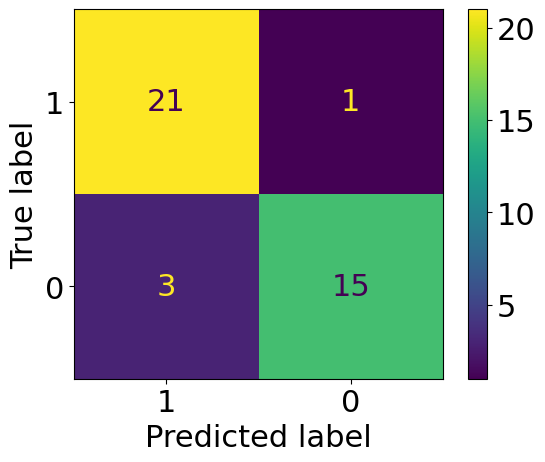

In [16]:
cm = confusion_matrix(test_df['mpg01'], test_df['Prediction'], labels=[1, 0])
cmd = ConfusionMatrixDisplay(cm, display_labels=[1, 0])
plt.rc('font', size = 22)
cmd.plot()

In [17]:
# Evaluate using the accuracy of the model
print(f"Correct Prediction Rate = {(test_df['mpg01'] == test_df['Prediction']).mean():.4f}")

Correct Prediction Rate = 0.9000


Our correct prediction rate is 90.0%. This is a high prediction accuracy so we can say the model is good.